<a href="https://colab.research.google.com/github/whosrara/Review-Shopee/blob/main/Review%20Shopee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library yang digunakan untuk pemrosesan bahasa alami
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd #untuk mengelola dan menganalisis data
from sklearn.model_selection import train_test_split #untuk memisahkan dataset menjadi training data dan testing data
from sklearn.feature_extraction.text import TfidfVectorizer #untuk mengubah teks menjadi vektor fitur dengan metode TF-IDF
from sklearn.naive_bayes import MultinomialNB #digunakan untuk model naive bayes
from sklearn.metrics import accuracy_score, classification_report #mengukur kerja model, menghitung akurasi
from nltk.corpus import stopwords #modul untuk stopword
from nltk.tokenize import word_tokenize #modul untuk tokenisasi
import string #membersihkan teks dari tanda baca
from nltk.stem import PorterStemmer, WordNetLemmatizer #untuk stemming dan lemmatisasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Membaca dataset
dataset = pd.read_csv('/content/drive/MyDrive/Natural Language Processing/shopee_ulasan.csv')
dataset.head()

,user,ulasan,label,tanggal
0,Nindya Widiyanti,"Banyak membantu..dalam jual beli, produk berku...",1,14 Maret 2021
1,Abdullah ibrahim,Ayo teman-teman kita mendownload shopee Karena...,1,14 Maret 2021
2,Dita Helina,"App sangggatttt rekomendasiiiiiii, buat belanj...",1,12 Maret 2021
3,Ngatmi Ami,"Shopee memang is the bast, tapi kalu boleh sar...",1,16 Maret 2021
4,Rifki pjm Kosong Dlapan,Aplikasi belanja mudah segala sesuatu kebutuha...,1,16 Maret 2021


In [ ]:
x = dataset['ulasan']
y = dataset['label']

In [ ]:
#Menampilkan jumlah data dan jumlah tiap label
print("Jumlah Data Total:", len(dataset))
print("Jumlah Data Positif:", len(dataset[dataset['label'] == 1]))
print("Jumlah Data Negatif:", len(dataset[dataset['label'] == 0]))

Jumlah Data Total: 2937
Jumlah Data Positif: 1668
Jumlah Data Negatif: 1269


#PREPROCESSING

In [ ]:
missing_values = dataset.isnull().sum()
print("Jumlah Data Kosong dalam Setiap Kolom:")
print(missing_values)

Jumlah Data Kosong dalam Setiap Kolom:
user       0
ulasan     0
label      0
tanggal    0
dtype: int64


In [ ]:
# Mendeteksi data duplikat
duplicate_rows = dataset[dataset.duplicated()]

# Menghapus data duplikat
data = dataset.drop_duplicates()

Tokenisasi

In [ ]:
#Lakukan tokenisasi untuk setiap ulasan
tokenized_ulasan = [word_tokenize(ulasan.lower()) for ulasan in x]

#Menampilkan hasil tokenisasi untuk beberapa ulasan
for i in range(5):  # Tampilkan tokenisasi untuk lima ulasan pertama
    print(f"Ulasan {i + 1}:")
    print(tokenized_ulasan[i])

Ulasan 1:
['banyak', 'membantu', '..', 'dalam', 'jual', 'beli', ',', 'produk', 'berkualitas', '&', 'harga', 'ringan', 'di', 'kantong', ',', 'terima', 'kasih', 'shopee']
Ulasan 2:
['ayo', 'teman-teman', 'kita', 'mendownload', 'shopee', 'karena', 'aplikasi', 'ini', 'membuat', 'aku', 'senang', 'aku', 'senang', 'sekali', 'membuka', 'paket-paket', 'yang', 'sudah', 'datang', 'dengan', 'aku', 'sudah', 'membeli', 'banyak', 'di', 'rumah', 'assalamualaikum', 'warahmatullahi', 'wabarakatuh']
Ulasan 3:
['app', 'sangggatttt', 'rekomendasiiiiiii', ',', 'buat', 'belanja', 'semakin', 'keceeee', 'tanpa', 'harus', 'repot', 'dan', 'susah', 'cari', 'barang']
Ulasan 4:
['shopee', 'memang', 'is', 'the', 'bast', ',', 'tapi', 'kalu', 'boleh', 'saran', 'untuk', 'spinjam', 'nya', 'kalau', 'bisa', 'di', 'tambah', 'llimit', 'bulan', 'nya', 'jadi', '6', 'bulan', 'ya', 'admin', '...']
Ulasan 5:
['aplikasi', 'belanja', 'mudah', 'segala', 'sesuatu', 'kebutuhan', 'ada', ',', 'penjual', 'pada', 'ramah', 'dan', 'pelayan

Case Folding

In [ ]:
#Mengkonversi ke huruf kecil
x = x.str.lower()

Stemming dan Lemmatisasi

In [ ]:
#memproses teks dengan teknik stemming dan lemmatisasi
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

Stopword

In [ ]:
# Inisialisasi stop words
stop_words = set(stopwords.words('indonesian'))

# Menghapus stopwords dan tanda baca
def preprocess_text(text, use_stemming=False, use_lemmatization=False):
    # Menghilangkan tanda baca
    text = ''.join([char for char in text if char not in string.punctuation])
    # Menghapus stopwords
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])

    # apply stemming or lemmatization
    if use_stemming:
        text = stem_text(text)

    if use_lemmatization:
        text = lemmatize_text(text)

    return text

# x = x.apply(preprocess_text)
# stemming
x = x.apply(lambda text: preprocess_text(text, use_stemming=True))

# lemmatization
x = x.apply(lambda text: preprocess_text(text, use_lemmatization=True))

Vectorisasi

In [ ]:
# Membangun model TF-IDF
vectorizer = TfidfVectorizer()
x_vec = vectorizer.fit_transform(x)
feature_names = vectorizer.get_feature_names_out()
def tf_idf(text):
  tfidf_matrix = vectorizer.transform([text]).todense()
  feature_index = x[0,:].nonzero()[1]
  skor = zip ([feature_names[i] for i in feature_index], [x[0, x] for x in feature_index])
  return dict (skor)

#MEMBANGUN MODEL


In [ ]:
#Membagi dataset menjadi data pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42)

In [ ]:
#Membangun model Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train)


MultinomialNB()

In [ ]:
#Memprediksi sentimen pada data pengujian
y_pred = naive_bayes.predict(x_test)

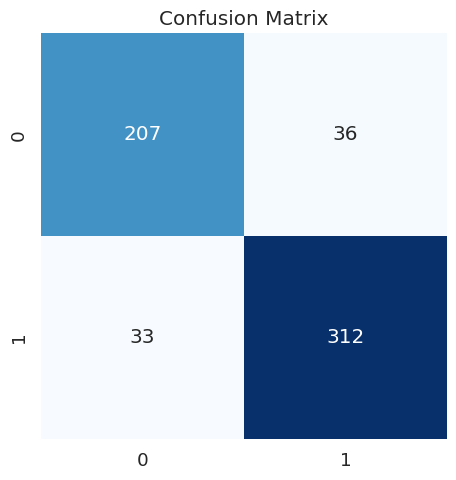

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Menghitung matriks kebingungan
confusion = confusion_matrix(y_test, y_pred)

#Membuat heatmap dari confusion matrix
# plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', cbar=False, square=True)
plt.tight_layout()  #Untuk memastikan label-label tidak terpotong

#Menampilkan plot confusion matrix
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')

#Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

Akurasi Model: 0.88
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       243
           1       0.90      0.90      0.90       345

    accuracy                           0.88       588
   macro avg       0.88      0.88      0.88       588
weighted avg       0.88      0.88      0.88       588



In [ ]:
#Uji model dengan ulasan produk baru
ulasan_produk_baru = input("Masukkan ulasan produk baru: ")
# Tokenisasi teks
tokens = word_tokenize(ulasan_produk_baru)
#hasil tokenisasi
print("Tokenisasi:", tokens)
#Case folding (pengubahan huruf menjadi huruf kecil)
teks_lower = ulasan_produk_baru.lower()
print("Case folding:", teks_lower)
# #hasil preprocessing
ulasan_produk_baru = preprocess_text(ulasan_produk_baru)
print("Tanpa stopwords :", ulasan_produk_baru)
# Preprocess teks dengan stemming
stemmed_text = preprocess_text(ulasan_produk_baru, use_stemming=True)
# Tampilkan hasil stemming
print("Hasil stemming:", stemmed_text)
ulasan_produk_baru_vec = vectorizer.transform([ulasan_produk_baru])
sentimen = naive_bayes.predict(ulasan_produk_baru_vec)

if sentimen[0] == 1:
    print('Sentimen: Positif')
else:
    print('Sentimen: Negatif')